In [1]:
#load all the necessary libraries
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import math

## Taylor's Theorem

1) Let us start easy. Give me a numpy array from -$\pi$ to +$\pi$. You can use math.PI for $\pi$. Let us called it `xs`

2) Built another numpy array called `ys` which is just the sin of `xs`

In [ ]:
xs = np.linspace(-np.pi, np.pi, 100)
ys = np.sin(xs)
plt.plot(xs, ys)
plt.grid()

3) Plot `xs` vs `ys`

In [2]:
fac = math.factorial

def g(x):
    return x - x**3/fac(3) + x**5/fac(5) - x**7/fac(7)

4) Plot 
$\begin{align} 
g(x) = x - \frac{x^3}{3!} + \frac{x^5}{5!} - \frac{x^7}{7!} 
\end{align}$

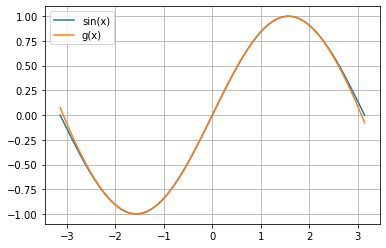

In [3]:
xs = np.linspace(-np.pi, np.pi, 100)
ys = np.sin(xs)
gxs = g(xs)
plt.plot(xs ,ys, label ='sin(x)')
plt.plot(xs, gxs, label='g(x)')
plt.grid()
plt.legend()

5) Plot g(x) and sin(x) on the same axis

In [8]:
def g1(x):
    return x
def g2(x):
    return x - x**3/fac(3)
def g3(x):
    return x - x**3/fac(3) + x**5/fac(5)
def g4(x):
    return x - x**3/fac(3) + x**5/fac(5) - x**7/fac(7)

6) Plot the $\sin$ function and the taylor series approximation( 1 term ) on the same axis

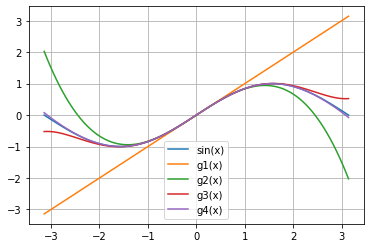

In [9]:
xs = np.linspace(-np.pi, np.pi, 100)
ys = np.sin(xs)
gxs = g(xs)
plt.plot(xs ,ys, label ='sin(x)')
plt.plot(xs, g1(xs), label='g1(x)')
plt.plot(xs, g2(xs), label='g2(x)')
plt.plot(xs, g3(xs), label='g3(x)')
plt.plot(xs, g4(xs), label='g4(x)')
plt.grid()
plt.legend()

7) Plot the $\sin$ function and the taylor series approximation( 2 terms ) on the same axis

In [24]:
g4(0.1)

0.09983341664682541

8) Plot the $\sin$ function and the taylor series approximation( 3 term ) on the same axis

In [25]:
0.1**8/fac(8)

2.4801587301587314e-13

9) Plot the $\sin$ function and the taylor series approximations(1,2,3,4 terms ) on the same axis. You can see that we get more and more accurate as we add more terms.

10) Write down the Taylor's theorem and what exactly is the squigly symbol $\xi$?

11) If we use only the two terms in the approximation, what is the bound on the uncertainty/error for approximating $\sin(0.5)$. Verify this numerically as well.

In [10]:
approx = g2(0.5)
print(approx)

error_lower_bound = 0*0.5**4/fac(4)
error_upper_bound = 1*0.5**4/fac(4)

our_range = (approx+error_lower_bound, approx+error_upper_bound)

print(our_range)
print('true value')
print(np.sin(0.5))

0.4791666666666667
(0.4791666666666667, 0.48177083333333337)
true value
0.479425538604203


12) Why don't we use abs(math.sin(0.5) - youranswer) to calculate the uncertainty?

13) If we want to approximate $\sin(0.5)$ that is accurate up to $10^{-7}$. How many terms do we need?

-1 to 1 comes from the fact that differentiation of sin give you sin and cosine... the min and max for any nth derivative is -1, 1... You could do a bit better on this though..

$$
    2\times\frac{0.5^n}{n!} \le 10^{-7}
$$
Factor of 2 comes from $1-(-1)

In [26]:
for i in range(10):
    if 2*0.5**i/fac(i) < 1e-7:
        print(i)
        break

9


# Numerical Derivative

1) Let $f(x) = x^3$ analytically calculate $f'(0.5)$.

In [16]:
3*0.5**2

0.75

2) Use forward finite difference to approximate $f'(0.5)$ with $h=0.1$

In [12]:
def forward_diff(f,x,h):
    return (f(x+h) - f(x))/h

def f(x):
    return x**3

print(forward_diff(f, x=0.5, h =0.1))
print(forward_diff(f, x=0.5, h =1e-3))

0.9099999999999997
0.7515009999999878


3) Use forward finite difference to approximate $f'(0.5)$ with $h=0.001$

4) Plot $f'(x)$ for $h=0.1$ and $h=0.001$ and analytic one

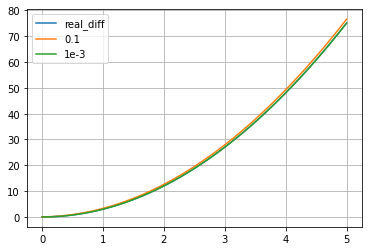

In [15]:
xs = np.linspace(0,5,100)
real_diff = 3*xs**2
very_lousy_diff = forward_diff(f, x=xs, h =0.1)
better_diff = forward_diff(f, x=xs, h =1e-3)
plt.plot(xs, real_diff, label = 'real_diff')
plt.plot(xs, very_lousy_diff, label = '0.1')
plt.plot(xs, better_diff, label = '1e-3')
plt.legend()
plt.grid()

5) Use centered finite difference to approximate $f'(0.5)$ with $h=0.1$

In [17]:
def diff(f,x,h):
    return (f(x+h) - f(x-h))/(2*h)
diff(f,0.5,0.1)
diff(f,0.5,1e-3)

0.7500009999999931

6) How about 

$$
- \frac{f(x+2h) + 8 f(x+h) - 8 f(x-h) + f(x-2h)}{12 h}
$$

7) Let $f(x) = \sin(x)$ analytically know that $f'(x)=\cos(x)$. Plot $\cos(x)$ along with the derivative of $\sin(x)$ obtained from finite difference. Pick a reasonable value for $h$ and plotting range.

8) Find $f''(0.5)$ for $f(x) = x^5$ using centered finite difference for $h=0.05$

In [29]:
def f(x):
    return x**5
def diff2(f,x,h):
    return (f(x+2*h) - 2*f(x) + f(x-2*h))/(4*h**2)

diff2(f, 0.5,1e-6)

2.4999958700422376

9) Given that formula what is the convergence rate? 

10) What can go wrong if $h$ is really really small?

In [30]:

diff2(f, 0.5, 1e-100)

0.0

# Newton's method with numerical derivative

1) Write a function
```def newton(f, start, n):```
that try to find solution of $f(x)=0$ given starting point at $x = start$ for n iteration. But this time you don't need to supply $f'(x)$ by hands.

Try it on our usual suspect: solving $x = \cos(x)$

# Edge Detection

1) Read in Mario.png
```
im = plt.imread(filename)
plt.imshow(im)
```

(480, 381, 4)


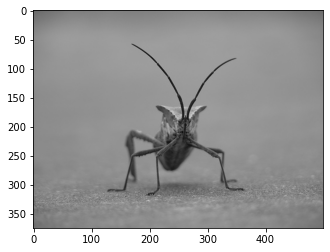

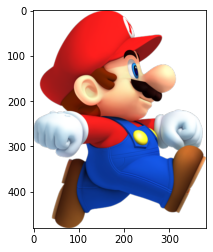

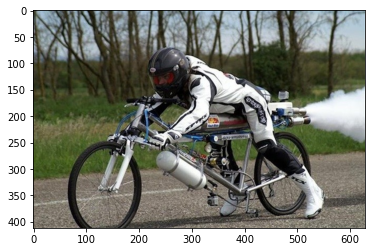

In [19]:
stinkbug = plt.imread('stinkbug.png')
mario = plt.imread('mario.png')
rocket = plt.imread('rocket-bicycle.png')
print(mario.shape)
plt.imshow(stinkbug)
plt.figure()
plt.imshow(mario)
plt.figure()
plt.imshow(rocket)

2) The dimension of each output is the following: Can you guess what each dimension means?

or read this http://matplotlib.org/api/image_api.html

In [20]:
mario.shape

(480, 381, 4)

In [21]:
mario[100,100]

array([0.8784314 , 0.10588235, 0.10588235, 1.        ], dtype=float32)

3) Try to get a pixel on mario hat. It should be really close to red [1,0,0,1]. Note that the first dimesion is actually y not x.
```
    mario[y,x]
```

4) You can make a big blob in the image too
```
    mario [10:20,30:40] = np.array([0,1,0,1]) #green
```
this changes the image array where the first index is 10 to 20 and second index from 30 to 40 all to green. This is called chunk assignment. Quite convenient.

Try imshow after you edit. If you need to reset mario, do 
```
mario = plt.imread('mario.png')
```


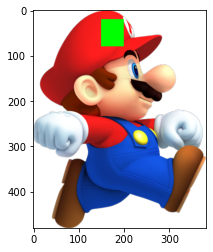

In [23]:
mario [20:80, 150:200] = np.array([0,1,0,1])
plt.imshow(mario)

5) What defines an edge? What quantity distinguish the pixel in the middle of the hat and the pixel separating the hat and his ear?

In [31]:
ny, nx, nc = mario.shape

def color_diff(ix, iy):
    north = np.sum(np.abs(mario[iy, ix] - mario[iy-1, ix]))
    south = np.sum(np.abs(mario[iy, ix] - mario[iy+1, ix]))
    west = np.sum(np.abs(mario[iy, ix] - mario[iy, ix-1]))
    east = np.sum(np.abs(mario[iy, ix] - mario[iy, ix+1]))
    return (north+south+west+east)/4.0

scores = np.zeros((ny, nx))


for iy in range(1, ny-1):
    for ix in range(1, nx-2):
        scores[iy, ix] = color_diff(ix, iy)

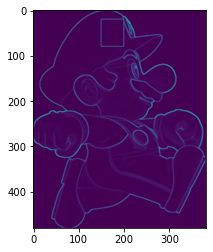

In [32]:

plt.imshow(scores)

6) Write a function that given location $y,x$ and then calculate how "likely" it is that pixel x,y is an edge pixel.

7) Make an empty 3d array of (ydimension, xdimension, ncolor). Then start putting in each pixel with the size of gradient.

8) Show the result.